In [80]:
import pprint
import numpy as np
from sklearn.tree import plot_tree
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

EXP1

In [52]:
wine = load_wine()
pprint.pprint(wine.data)
pprint.pprint(wine.target)
pprint.pprint(wine.data.shape)
pprint.pprint(wine.feature_names)
pprint.pprint(wine.target_names)

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2,

In [53]:
col = ["酒精", "苹果酸", "灰", "灰的碱性", "镁", "总酚", "类黄酮", "非黄烷类酚类", "花青素", "颜色强度", "色调", "稀释葡萄酒", "脯氨酸"]
cls = ["琴酒", "雪莉", "贝尔摩斯"]
X = pd.DataFrame(data=wine["data"], columns=col)
Y = pd.DataFrame(data=wine["target"], columns=["标签"])
df = pd.concat([X, Y], axis=1)
df.head()

,酒精,苹果酸,灰,灰的碱性,镁,总酚,类黄酮,非黄烷类酚类,花青素,颜色强度,色调,稀释葡萄酒,脯氨酸,标签
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [54]:
mms = MinMaxScaler()
mms.fit(X)
X_trans = mms.transform(X)

x_train,x_test,y_train,y_test = train_test_split(X_trans,Y,train_size=0.7,shuffle=True,random_state=42)
print(f"x_train: {x_train.shape}\ty_train: {y_train.shape}\nx_test: {x_test.shape}\t\ty_test: {y_test.shape}")

x_train: (124, 13)	y_train: (124, 1)
x_test: (54, 13)		y_test: (54, 1)


In [55]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [56]:
print("score:\t\t\t", round(clf.score(x_test, y_test), 3))
[*zip(col,clf.feature_importances_)]

score:			 0.833


[('酒精', 0.3150966228386423),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.0200751561042817),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.047682606675380046),
 ('颜色强度', 0.08546976259481444),
 ('色调', 0.07198366539758595),
 ('稀释葡萄酒', 0.4427732406723812),
 ('脯氨酸', 0.016918945716914314)]

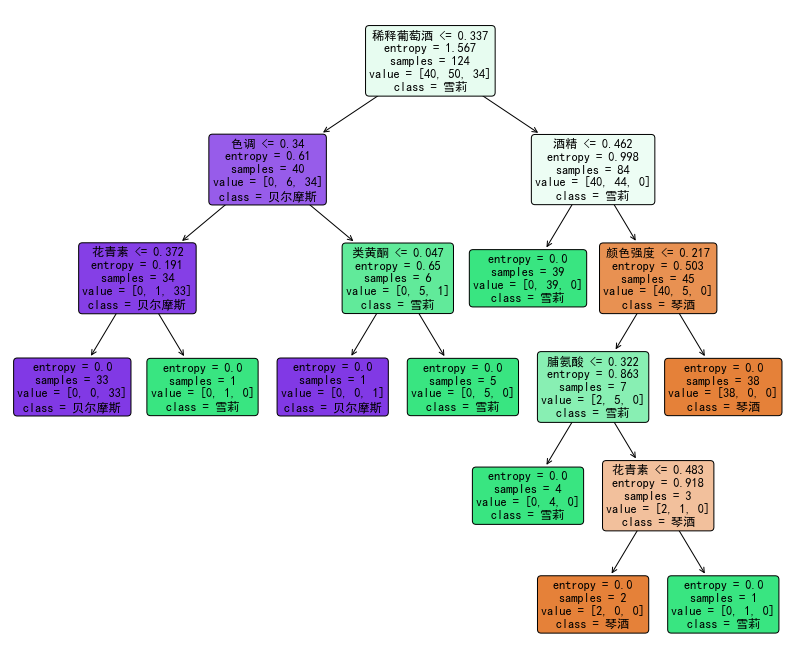

In [57]:
plt.figure(figsize=(14, 12))
plot_tree(clf,filled=True,rounded=True,feature_names=col,class_names=cls)
plt.show()

EXP2

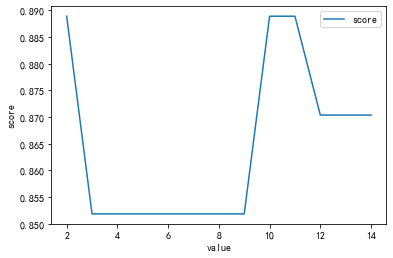

score:			 0.963


In [92]:
x_train,x_test,y_train,y_test = train_test_split(X_trans,Y,train_size=0.7,shuffle=True,random_state=42)
score = []
for x,y,z in zip(range(2,15),range(2,15),range(2,15)):
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=x,min_samples_leaf=y,min_samples_split=z)
    _sc = []
    for i in range(100):
        clf.fit(x_train,y_train)
        _sc.append(clf.score(x_test,y_test))
    score.append([np.array(_sc).mean(),x,y,z])
score = np.array(score)

plt.plot(score[:,1],score[:,0],label='score')
plt.xlabel("value")
plt.ylabel('score')
plt.legend()
plt.show()

clf = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=10,min_samples_split=10)
clf.fit(x_test,y_test)
print("score:\t\t\t", round(clf.score(x_test, y_test), 3))

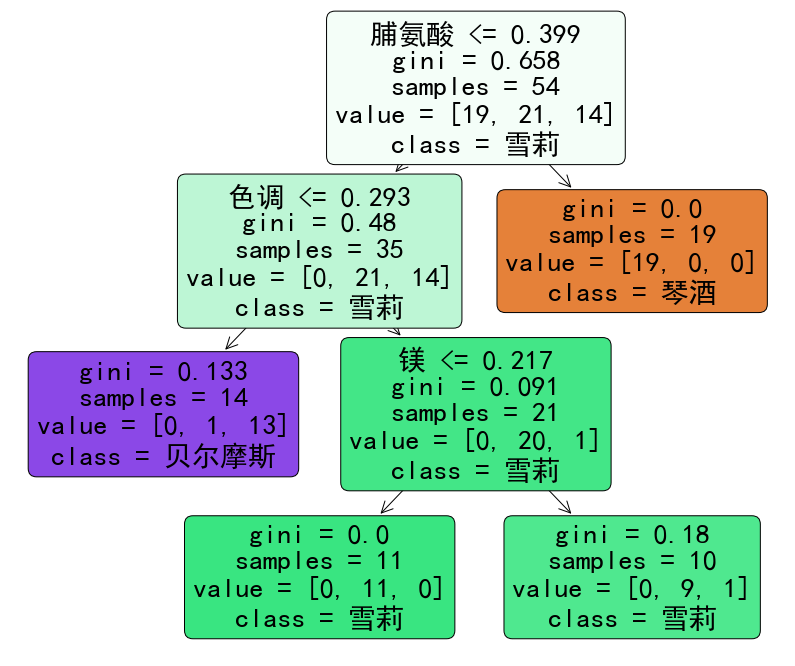

In [93]:
plt.figure(figsize=(14, 12))
plot_tree(clf,filled=True,rounded=True,feature_names=col,class_names=cls)
plt.show()